In [1]:
import gym
import random
import matplotlib.pyplot as plt
import numpy as np
from stable_baselines3 import PPO
from Pinball_bot import PinBallBot
import my_env_util
from importlib import reload
reload(my_env_util)
from my_env_util import make_my_atari_env
from stable_baselines3 import A2C

In [3]:
# env = BoxToBoxWrapper(make_my_atari_env('VideoPinball-v0', seed=0))
wrapper_kwargs = {'start_x': 150, 'stop_x': 210, 'start_y': 60, 'stop_y': 100}
env = make_my_atari_env('VideoPinball-v0', seed=0, wrapper_kwargs=wrapper_kwargs)
# env = VecFrameStack(env, n_stack=4)

In [4]:
env.observation_space.shape

(3, 60, 40)

In [5]:
# ?env
env.reset()
obs, rewards, dones, info = env.step([0])
obs.shape

(1, 3, 60, 40)

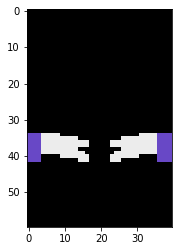

In [6]:
img = obs[0,:,:,:]
img = np.moveaxis(img, 0, -1)
plt.imshow(img)